Libraries imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as spy
import seaborn as sns

Read car_design.csv data

In [2]:
df = pd.DataFrame(pd.read_csv('car_design.csv'))

Display first 5 rows of dataframe

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## (A) : Data Wrangling

### Qs 1 : State the dimensions of the dataset, mention rows and columns. 

Dimention of dataset

In [4]:
print("Dataset is of ", df.ndim, " dimension.")

Dataset is of  2  dimension.


Rows and column of dataset

In [5]:
print("Dataset has ", df.shape[0], " rows.","\nDataset has ", df.shape[1], " columns.")

Dataset has  205  rows. 
Dataset has  26  columns.


### Qs 2  : State the data types  ie how many attributes are numeric and non mumeric 

Datatypes

In [6]:
print("Data Types :")
print(df.dtypes)

Data Types :
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Total number of numeric and non numeric attributes

In [7]:
cnt = [1 for i in df.columns if df[i].dtypes == "int64" or df[i].dtypes == "float64"]
print("Numeric attributes are : ", sum(cnt), "\nNon-Numeric attributes are : ",len(df.columns)-sum(cnt))

Numeric attributes are :  10 
Non-Numeric attributes are :  16


### Qs 3 : Dataset contains junk value "?", therefore replace it with NaN and state then state the columns wise null values.

Replace "?" with NaN in the database

In [8]:
df = df.replace("?", np.nan)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Columns wise null values

In [9]:
df[df.columns[df.isnull().any()]].isnull().sum()

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

### Qs 4 : Fill the missing data of normalised-losses, price, horsepower, peak-rpm, bore, stroke with the respective column mean and fill missing data of Number of doors column with the mode of the column i.e. Four.


Replace missing data of normalised-losses, price, horsepower, peak-rpm, bore, stroke with the respective column mean

In [10]:
for i in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[i] = df[i].fillna(round(df[i].dropna().astype('float64').mean(),2))

Fill missing data of Number of doors column with the mode of the column i.e. Four

In [11]:
no_of_doors = {"one":1, "two":2, "three":3, "four":4}
num = spy.mode([no_of_doors.get(i) for i in df['num-of-doors'] if i in no_of_doors])
df['num-of-doors'] = df['num-of-doors'].fillna(list(no_of_doors.keys())[list(no_of_doors.values()).index(num.mode[0])])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## (B) Summary Statistics 

### Qs 5 : Display the statistical properties of all the  numeric attributes and  write your observations

Statistical properties of all the numeric attributes

In [12]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Observations

 Maximum value for symboling, engine-size, compression-ratio column is an outlier as it is much greater than mean value.

### Some Extra Inferences:

In [83]:
print(df[df['symboling'] == -2]['make'].unique())
print(df[df['symboling'] == 3]['make'].unique())
print(df[df['symboling'] == 0]['make'].unique())

['volvo']
['alfa-romero' 'dodge' 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan'
 'plymouth' 'porsche' 'saab' 'toyota' 'volkswagen']
['audi' 'bmw' 'chevrolet' 'honda' 'isuzu' 'jaguar' 'mazda' 'mercedes-benz'
 'nissan' 'peugot' 'renault' 'subaru' 'toyota' 'volkswagen']


From above results we can say that:

    1.Symboling of 11 auto makers is 3 which indicates that cars are not safe.
    2.Symboling of Volvo i.e -2 shows that it has safest cars and no other Auto company.
    3.Symboling of 14 auto makers shows that the risk level is neutral or there is no risk.

## (C) Data Visualization 

### Qs 6 :  Plot histograms of the following numerical attributes -- "engine-size", "peak-rpm","horsepower","price" and state your findings.

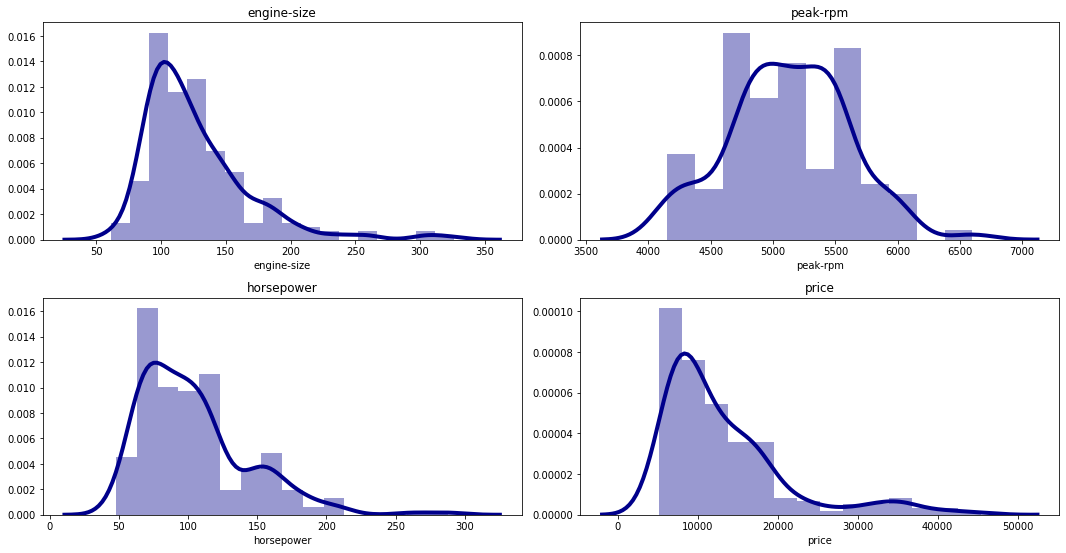

In [14]:
hist_col_names = ["engine-size", "peak-rpm","horsepower","price"]
for i in hist_col_names:
    df[i] = df[i].astype(float) # It changes data type

plt.figure(figsize=(15,15))
cnt=1
for i in hist_col_names:
    plt.subplot(4,2,cnt)
    sns.distplot(df[i], hist=True, color = 'darkblue', kde_kws={'linewidth': 4})
    plt.title(i)
    cnt=cnt+1
plt.tight_layout()
plt.show()

Findings

    1) In Engine-size, data is more accumulated towards between 50 to 200, which also states that it is positively skewed.
    2) Most of the data is accumulated towards left of the mean. 
    3) As we can see peak-rpm histogram plot shows no skewness visually but if we compute the skewness mathematically, it turns out to be negligible but on the positive side.

### Qs 7 : Plot a correlation matrix of all the attributes and state the findings.

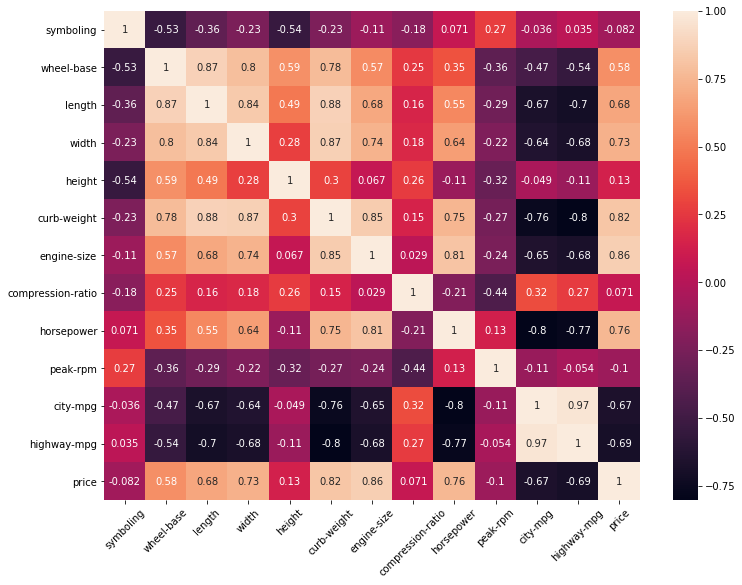

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()

Findings

    1) The indicator displayed in the right hand side of the heat map indicates the relation going positive to negtaive as we go from top to bottom. 
    2) In heat map of the corealtion matrix we can see that the diagonal values from the left-top corner to right-bottom corner is 1, because it shows the corelation of the column with itself.
    3) In this we found out that, city-mpg and highway-mpg have a highest positive corelation i.e. 0.97,
    4) Similarly city-mpg and horsepower & highway-mpg and curb-weight have lowest negative corelation i.e. -0.8.
    

### Qs 8 : How are the various elements of the attribute "body-style" related to price ? State your findings through boxplots

In [18]:
body_styles = list(df['body-style'].unique()) #It return unique values of column
body_styles_list = []
for i in body_styles:
    body_styles_list.append(df['price'][df['body-style']==i])

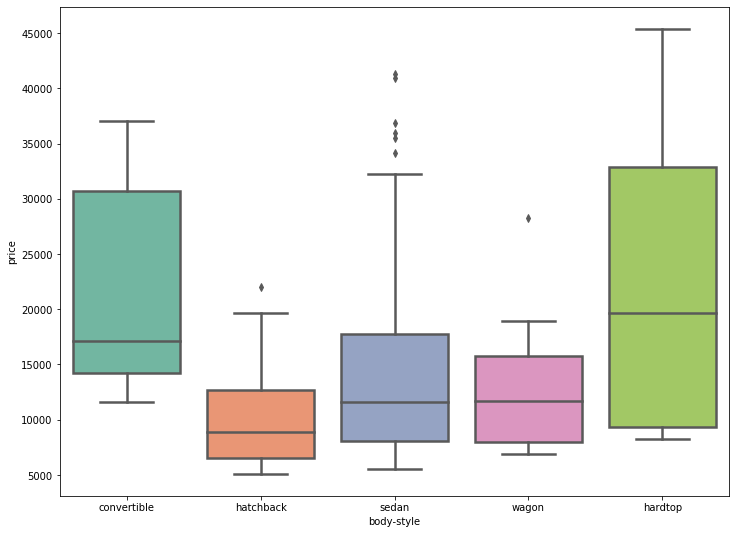

In [19]:
plt.figure(figsize=(12, 9))
sns.boxplot(df['body-style'], y=df['price'], linewidth=2.5, palette ='Set2')
plt.show()

Findings

Here we can see that the  hatchback cars are in the lowest price range  and hardtop cars are in the highest price range.

### Qs 9 : How are the various attributes of the "make" columns related to price ..State your findings through boxplots.

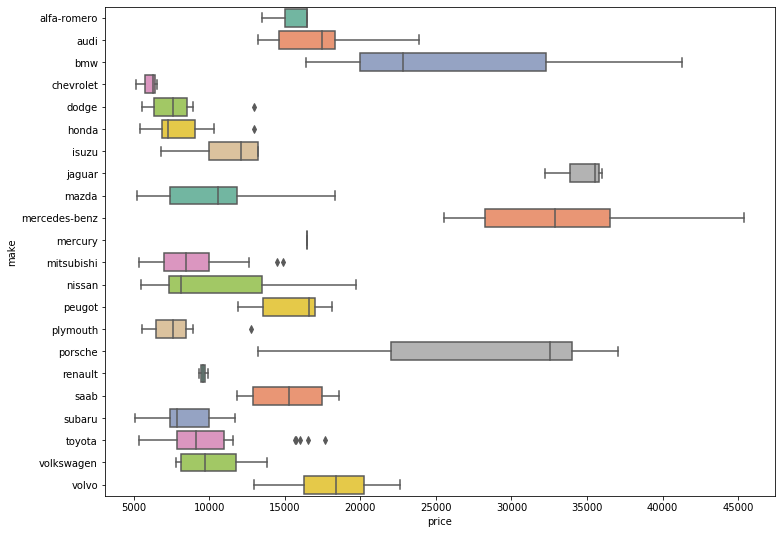

In [21]:
plt.figure(figsize=(12, 9))
ax = sns.boxplot(df['price'], df['make'], linewidth=1.5,orient='h', palette ='Set2')

Findings

Here we can see that according to make Cars are divided into 3 categories according to price:
1. Low Price(5000-12000)-  Chevrolet, Dodge, Honda etc.
2. Medium Price Category(12000-20000)- Volvo, Peugot, Mercury etc.
3. High Price Category(20000 and above)- BMW, Jaguar, Mercedes-benz etc.

### Here we check co-relation between Engine-Size and Price

Coefficient of Co-relation:  0.8617522437476118


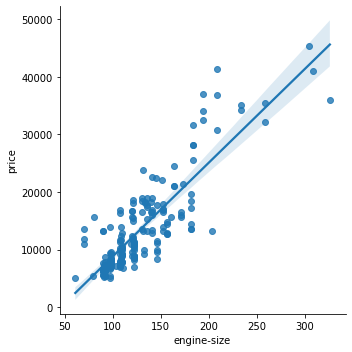

In [88]:
x=df['engine-size']
y=df['price']
a=spy.pearsonr(x, y)
print("Coefficient of Co-relation: ", a[0])
sns.lmplot(x="engine-size", y="price", data=df);

We can observe that Engine-Size is directly co-related to Price, so we can say that if Engine-size increases Price will also increase.

#### Here we checkco-relation between City-MPG and Highway-MPG

Coefficient of Co-relation:  0.9713370423425044


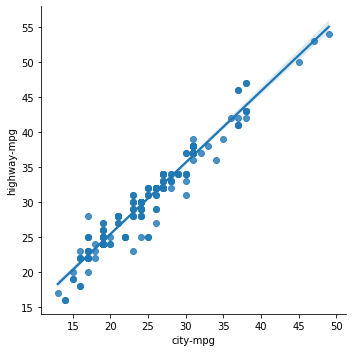

In [86]:
x=df['city-mpg']
y=df['highway-mpg']
a=spy.pearsonr(x, y)
print("Coefficient of Co-relation: ",a[0])
sns.lmplot(x="city-mpg", y="highway-mpg", data=df);

We can see that City-mpg and Highway-Mpg share a high co-relation so we can say that if city-mpg increases highway-mpg will also increase.

### Here we find co-realation between city-mpg and Engine-size.

Coefficient of Co-relation:  -0.65365791631142
SpearmanrResult(correlation=-0.7300555874370691, pvalue=2.0888428693424753e-35)


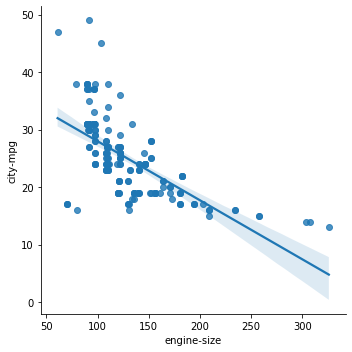

In [87]:
y=df['city-mpg']
x=df['engine-size']
a=spy.pearsonr(x, y)
print("Coefficient of Co-relation: ", a[0])
print(spy.spearmanr(x, y)) 
sns.lmplot(y="city-mpg", x="engine-size", data=df);

We observe that engine-size is negatively moderately related to city-mpg, so we can say that if Engine-size increases, city-mpg decreases.  

### Here we plotted Drive-wheels against price to find price range.

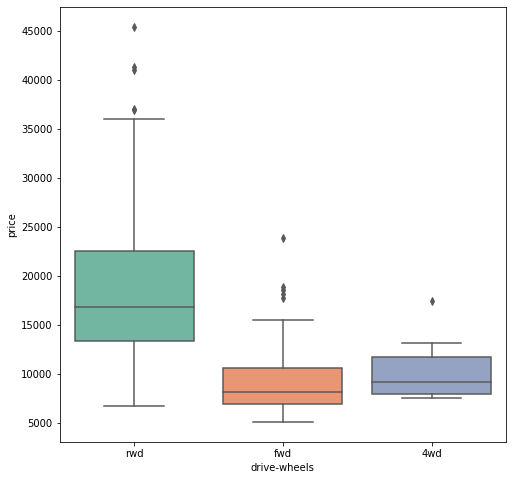

In [65]:
plt.figure(figsize=(8,8))
sns.boxplot(x="drive-wheels", y="price", data=df,linewidth=1.5, palette ='Set2')

Here we can clearly see that:
1. Rear Wheel Drive cars are high priced i.e. in range 12000 to 36000
2. Forward Wheel Drive cars are lowest priced i.e. in range 5000 to 15000 

### Here we found the average price according to drive-wheels

In [69]:
df_group=df[['drive-wheels', 'body-style', 'price']]
drive_wheel_avg=df_group.groupby(['drive-wheels'], as_index=False).mean()
drive_wheel_avg

,drive-wheels,price
0,4wd,10570.570000
1,fwd,9310.818833
2,rwd,19671.422763


Average price of Rear Wheel Drive is the highest while for Front wheel and 4 Wheel are approximately same. 

### Here we calculated average price of Drive-wheel according to the body-style.

In [72]:
group_avg=df_group.groupby(['drive-wheels','body-style'] , as_index=False).mean()
group_avg

,drive-wheels,body-style,price
0,4wd,hatchback,10405.065000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934386
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Here we can see the price of Drive-Wheel according to Body-Type

### Here we Converted the above table into pivot table to get a precise view to understand better.

In [77]:
pivot_table=group_avg.pivot(index='drive-wheels', columns='body-style')
pivot_table=pivot_table.fillna('Not Applicable')
pivot_table

price                                              \
body-style       convertible         hardtop     hatchback         sedan   
drive-wheels                                                               
4wd           Not Applicable  Not Applicable  10405.065000  12647.333333   
fwd                    11595            8249   8396.387755   9930.934386   
rwd                  23949.6         24202.7  14278.270000  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# So by all this analysis we can draw a conclusion that we can Price our car acccording to the avearge price of that category which is mentioned in the above table.